In [1]:
import pandas as pd
import matplotlib 
import numpy as np
import mglearn

In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import fetch_lfw_people           #아거 왜 다운이 안되니
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler                    # scaler
from sklearn.decomposition import PCA                             # PCA (주성분 분석)
from sklearn.decomposition import NMF                             # NMF (실습 아직 \)
from sklearn.manifold import TSNE                                 # t-sne (안함)
from sklearn.cluster import KMeans                                # K-평균 군집
from sklearn.cluster import AgglomerativeClustering               # 병합 군집
from sklearn.cluster import DBSCAN                                # DBSCAN
from sklearn.metrics.cluster import adjusted_rand_score           # ARI
from sklearn.metrics.cluster import normalized_mutual_info_score  # NML
from sklearn.metrics.cluster import silhouette_score              # 실루엣 계수
import matplotlib.pyplot as plt

In [4]:
cancer = load_breast_cancer()

print(cancer.keys())
print(cancer.data.shape)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
(569, 30)


In [6]:
from sklearn.svm import SVC 
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
#scaler = StandardScaler()

scaler.fit(X_train)      #최솟값 최대값 계산

X_train_scaled = scaler.transform(X_train)     # X_scaled = scaler.fit_transform(X_train) 가능
X_test_scaled = scaler.transform(X_test)

print("조정 전")
print("min:\n", X_train.min(axis=0))
print("max:\n", X_train.max(axis=0))
print()
print("조정 후")
print("train min:\n", X_train_scaled.min(axis=0))
print("train max:\n", X_train_scaled.max(axis=0))
print("test min:\n", X_test_scaled.min(axis=0))
print("test max:\n", X_test_scaled.max(axis=0))


조정 전
min:
 [7.691e+00 9.710e+00 4.792e+01 1.704e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.167e-01 4.996e-02 1.115e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 7.882e-03 8.948e-04 8.678e+00
 1.202e+01 5.449e+01 2.236e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.565e-01 5.504e-02]
max:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.114e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.184e-01 9.379e-01 1.252e+00 2.910e-01
 6.638e-01 1.730e-01]

조정 후
train min:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
train max:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
test min:
 [-0.03477154  0.04159621 -0.02937829 -0.01154209  0.14128374  0.05547565
  0.          0.         -0.0571276   0.05686605  0.00184682  0.0264984

In [7]:
svm = SVC(gamma='auto')


print('Not scaled accuracy:', svm.fit(X_train, y_train).score(X_test, y_test))
print('Scaled accuracy:', svm.fit(X_train_scaled, y_train).score(X_test_scaled, y_test))


Not scaled accuracy: 0.6228070175438597
Scaled accuracy: 0.9649122807017544


origin shape: (569, 30)
scaled shape: (569, 2)
components_ shape: (2, 30)
components_: [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


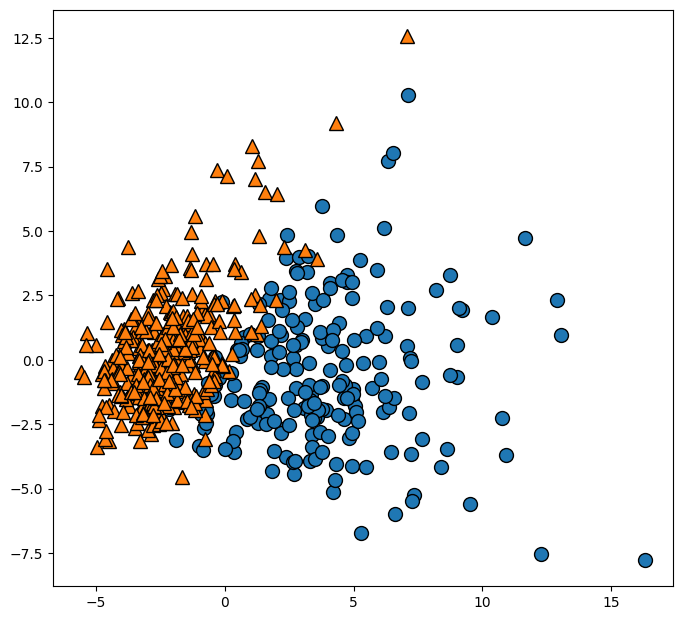

In [30]:
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

pca = PCA(n_components=2)
# components_속성에 주성분 저장
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)

print("origin shape:", X_scaled.shape)
print("scaled shape:", X_pca.shape)
print("components_ shape:", pca.components_.shape)
print("components_:", pca.components_)

plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.gca().set_aspect("equal")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

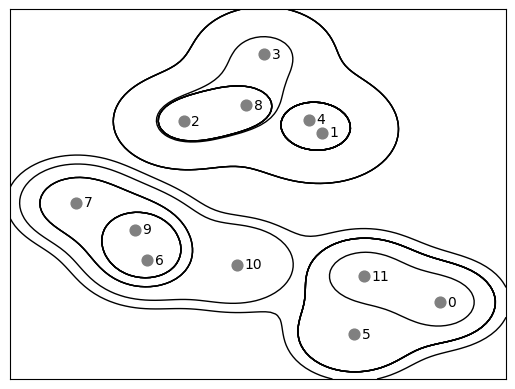

In [5]:
mglearn.plots.plot_agglomerative()

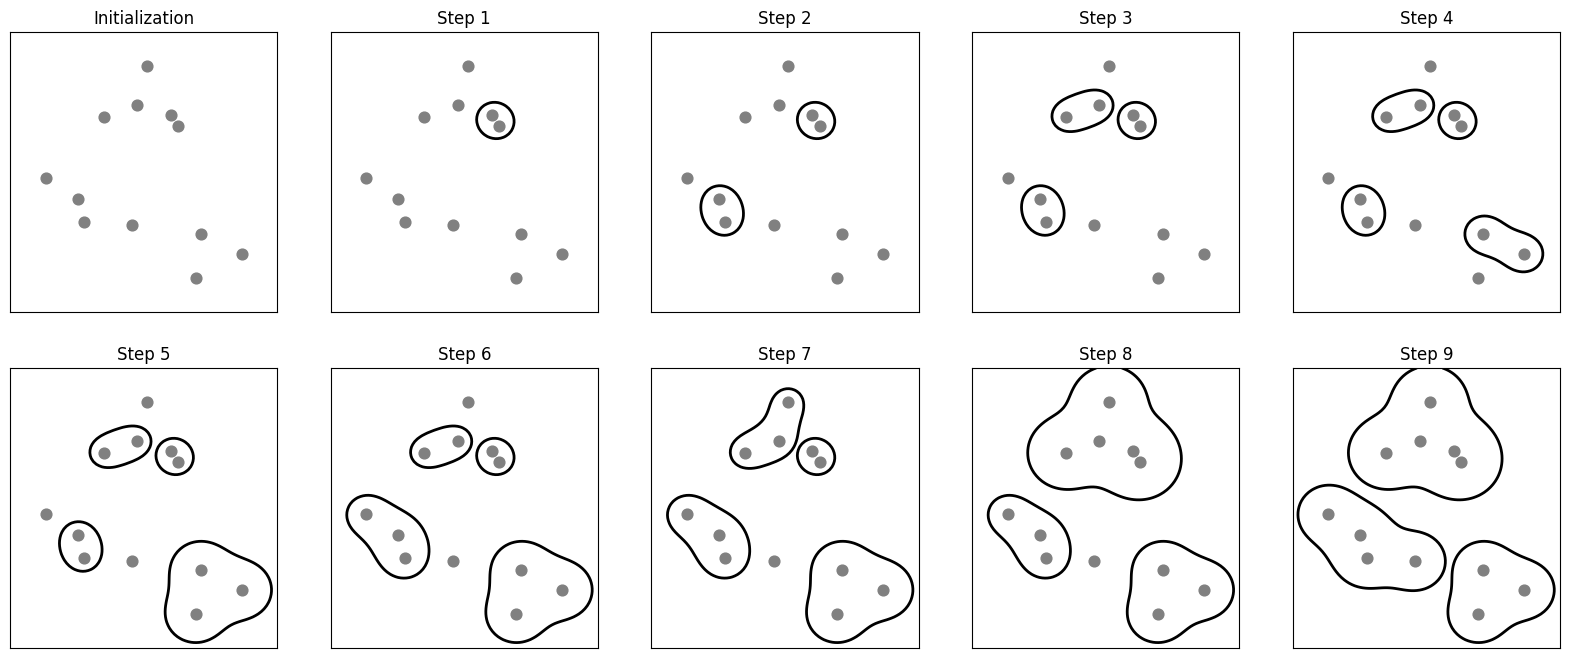

In [3]:
mglearn.plots.plot_agglomerative_algorithm()    #병합 군집

/home/jeongbyeolsol/.local/lib/python3.10/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


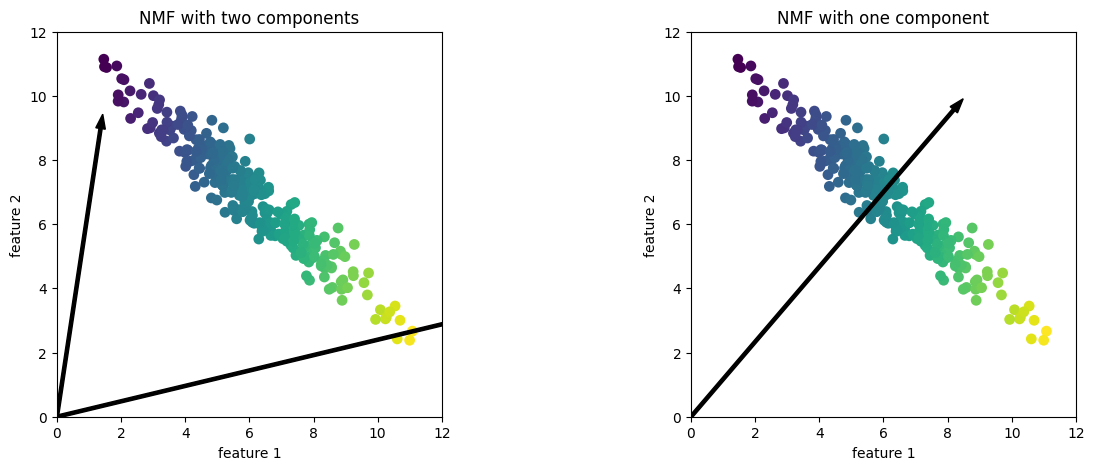

In [31]:
mglearn.plots.plot_nmf_illustration()

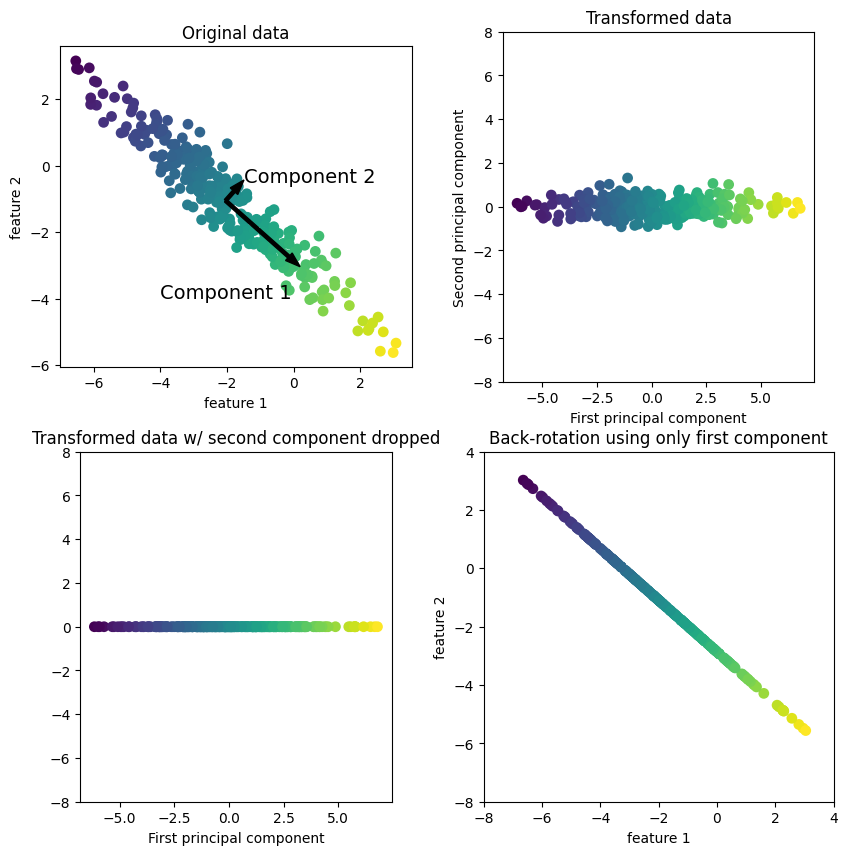

In [29]:
mglearn.plots.plot_pca_illustration()

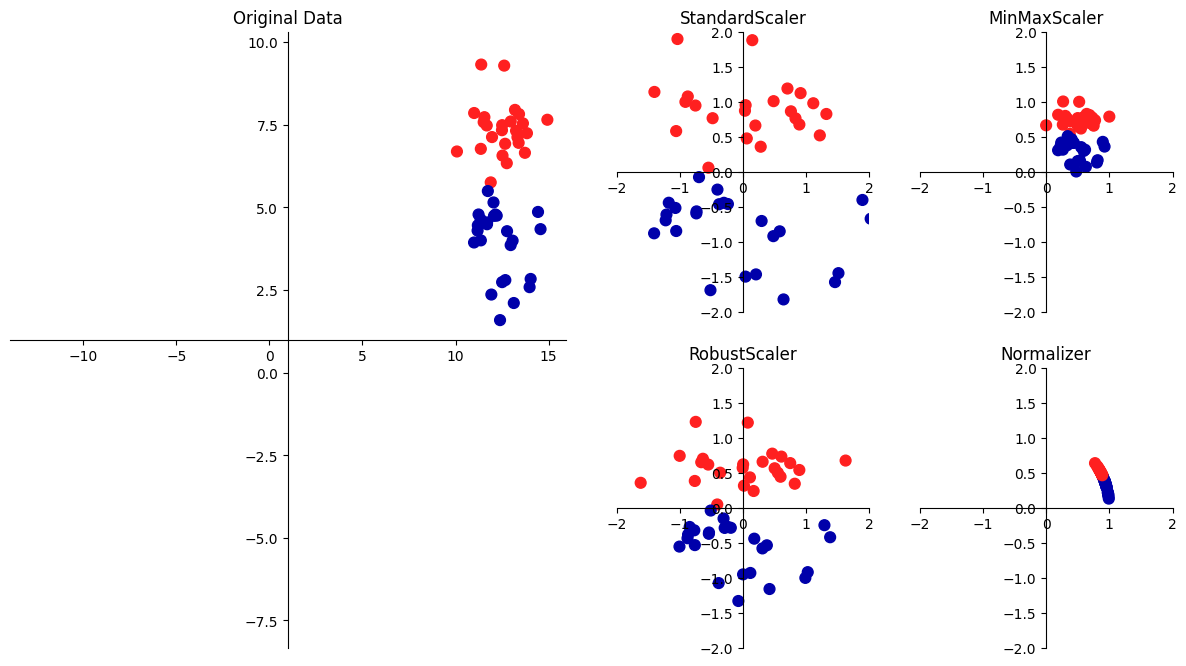

In [3]:
mglearn.plots.plot_scaling()